# Data Science Architect Test: Herdez Grup



## Objective: Forecast the sales of the attached time series dataset.

## Note: You can use any necessary model(s) to achieve the best fit for the test.

## Suggestion: Utilize external sources.



## Instructions: 

## Carry out the development of each of the following steps:
* This step is crucial for optimal results. It is recommended to use additional variables (external sources) such as seasonality, calendar events, weather, etc. (keep in mind that the business context is a company selling food products).

* This step complements the previous one. If you decide to add external sources, apply this step; otherwise, you can omit it.
Consider analyzing outliers, missing values, etc., during this step.

* Explore your data by analyzing trends, seasonality, white noise, etc.
This step is essential for the model's performance. Apply the necessary feature engineering to model the data effectively.

* Generate a forecast per week, store, and product with a time horizon of 12 months (52 weeks).

In [51]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

In [52]:
# Cargar el dataset
file_path = 'data/test_seriedatos_arquitectodatascience-1.cvs'
data = pd.read_csv(file_path)

In [53]:
# Mostrar las primeras filas y la información del DataFrame
print(data.head())
print(data.info())

   Anio  Semana   Sucursal Cadena Nivel Socioeconomico          Recurso  \
0  2020      46  Norte 286     SA                  D/E  68524 Alimentos   
1  2021      20  Norte 286     SA                  D/E  68524 Alimentos   
2  2018      23  Norte 286     SA                  D/E  68524 Alimentos   
3  2021      37  Norte 286     SA                  D/E  68524 Alimentos   
4  2020      10  Norte 286     SA                  D/E  68524 Alimentos   

   Venta_piezas  Venta_valor     Precio  Promocion  
0           226      4429.00  19.597345          0  
1           154      2754.81  17.888377          1  
2           228      3176.59  13.932412          1  
3           163      3112.00  19.092025          0  
4           212      3885.50  18.327830          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Anio               

In [54]:
# Manejar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)
data.fillna(method='ffill', inplace=True)  # Ejemplo: completar valores faltantes hacia adelante


Valores faltantes por columna:
 Anio                    0
Semana                  0
Sucursal                0
Cadena                  0
Nivel Socioeconomico    0
Recurso                 0
Venta_piezas            0
Venta_valor             0
Precio                  0
Promocion               0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11224\2121568213.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Ejemplo: completar valores faltantes hacia adelante


In [55]:
# Convertir 'Anio' y 'Semana' a formato datetime
data['Date'] = pd.to_datetime(data['Anio'].astype(str) + '-W' + data['Semana'].astype(str) + '-1', format='%Y-W%W-%w')
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

In [56]:
# Análisis de outliers usando IQR
Q1 = data['Venta_valor'].quantile(0.25)
Q3 = data['Venta_valor'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (data['Venta_valor'] < (Q1 - 1.5 * IQR)) | (data['Venta_valor'] > (Q3 + 1.5 * IQR))
data.loc[outlier_condition, 'Venta_valor'] = np.nan
data['Venta_valor'].fillna(method='ffill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11224\3490707822.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Venta_valor'].fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11224\3490707822.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Venta_valor'].fillna(method='ffill', inplace=True)


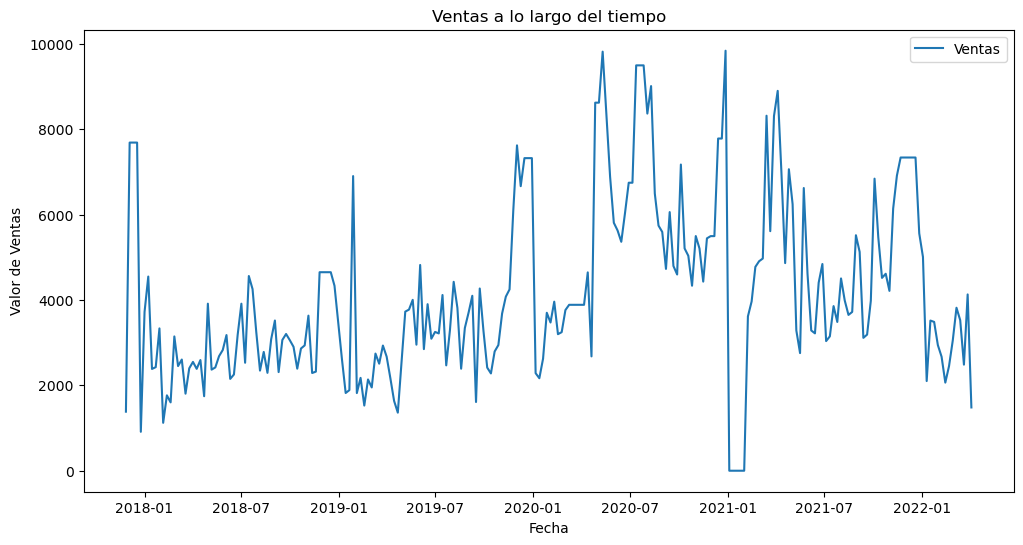

In [57]:
# Visualizar las ventas a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(data['Venta_valor'], label='Ventas')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor de Ventas')
plt.legend()
plt.show()

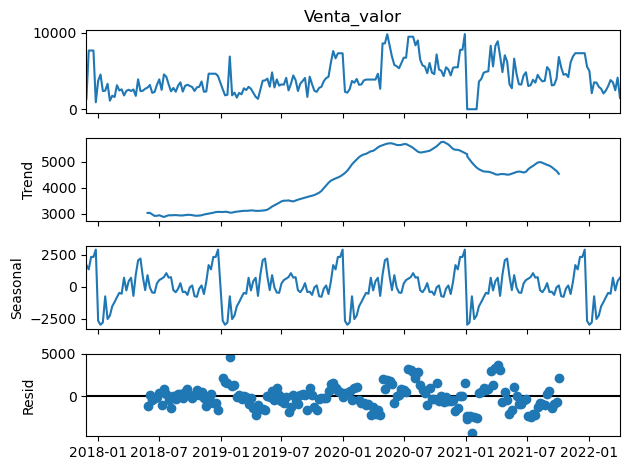

In [58]:
# Descomposición estacional
decomposition = seasonal_decompose(data['Venta_valor'], model='additive', period=52)
decomposition.plot()
plt.show()

In [59]:
# Crear variables adicionales (calendario)
data['Month'] = data.index.month
data['Weekday'] = data.index.weekday
data['IsWeekend'] = data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [60]:
# Aquí puedes agregar datos externos si los tienes disponibles, como clima o festivos.

# Modelado con SARIMA
# Ajusta los parámetros según los datos específicos
model = SARIMAX(data['Venta_valor'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 52), 
                exog=data[['Month', 'IsWeekend']])
results = model.fit()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
# Resumen del modelo
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                        Venta_valor   No. Observations:                  228
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1540.931
Date:                            Thu, 21 Nov 2024   AIC                           3095.862
Time:                                    17:50:53   BIC                           3118.015
Sample:                                         0   HQIC                          3104.848
                                            - 228                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Month        289.2020    106.452      2.717      0.007      80.559     497.845
IsWeekend           0   5.51e+04   

In [80]:
# Evaluación del modelo con datos históricos (si aplica)
start_date = '2022-01-01'
end_date = '2023-01-01'
if start_date in data.index and end_date in data.index:
    actual = data['Venta_valor'][start_date:end_date]
    predictions = results.predict(start=start_date, end=end_date, exog=data[['Month', 'IsWeekend']][start_date:end_date])
    mse = mean_squared_error(actual, predictions)
    print(f'Mean Squared Error (MSE): {mse}')

In [82]:
# Generar pronósticos para las próximas 52 semanas
forecast_steps = 52
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')
forecast_exog = pd.DataFrame({
    'Month': forecast_index.month,
    'IsWeekend': [1 if d.weekday() >= 5 else 0 for d in forecast_index]
}, index=forecast_index)
forecast = results.get_forecast(steps=forecast_steps, exog=forecast_exog)
forecast_values = forecast.predicted_mean

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


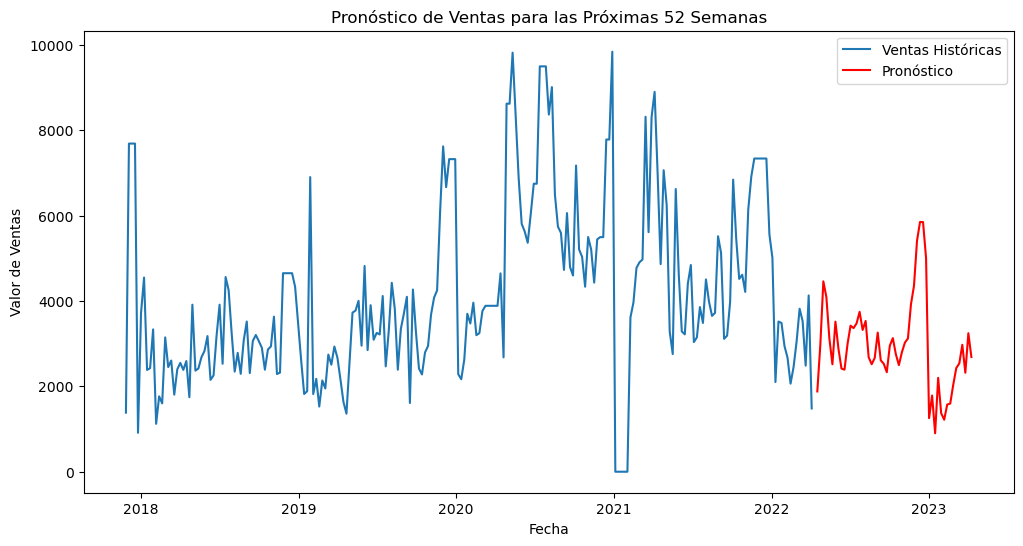

In [84]:
# Graficar ventas históricas y pronóstico
plt.figure(figsize=(12, 6))
plt.plot(data['Venta_valor'], label='Ventas Históricas')
plt.plot(forecast_index, forecast_values, label='Pronóstico', color='red')
plt.title('Pronóstico de Ventas para las Próximas 52 Semanas')
plt.xlabel('Fecha')
plt.ylabel('Valor de Ventas')
plt.legend()
plt.show()

# Explicación del Código

1. Carga y Limpieza de Datos:

* Los valores faltantes se manejan con imputación hacia adelante (forward fill).

* Se convierten las columnas de año y semana a un índice de fecha (Date).

2. Análisis Exploratorio:

* Se identifican y manejan valores atípicos (outliers) usando el rango intercuartil (IQR).

* Se realiza un análisis visual de la serie temporal.

3. Variables Adicionales:

* Se crean variables de calendario como mes, día de la semana y si es fin de semana.

* Puedes agregar variables externas, como clima o días festivos.
Modelado SARIMA:

Se utiliza un modelo SARIMA que incluye las variables adicionales como regresores externos.

4. Pronóstico:

* Se generan predicciones para las próximas 52 semanas.
Los resultados se grafican junto con los datos históricos.

5. Evaluación del Modelo:

* Se mide el desempeño del modelo utilizando el error cuadrático medio (MSE) si hay datos históricos disponibles para validación.

## Mejoras Opcionales:

* Fuentes Externas: Agrega datos como clima o festividades para mejorar el modelo.
  
* Optimización Automática: Utiliza herramientas como auto_arima para encontrar los mejores parámetros del modelo.

  
* Pronósticos Desglosados: Ajusta el modelo para predecir por sucursal y producto si los datos lo permiten.